In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [3]:
df = pd.read_csv(r'C:\Users\Ashish Gupta\Desktop\Python\Data Analyst - Test Data - US.csv')

In [4]:
df.head()

,Review,date,Location
0,I was very impressed with the resort.\n Great ...,2019/08/20,Sebastian
1,The rooms were nice the outside needs work als...,2019/08/20,Los Angeles
2,Great location! I have stayed at this hotel on...,2019/08/20,Georgia
3,The hotel was adequate for my stay. The strips...,2019/08/20,NaN
4,"Great location, room was large and spacious. P...",2019/08/19,Palm Harbor


### Data Preprocessing

In [5]:
df.isnull().sum()

Review        55
date           0
Location    4737
dtype: int64

###### Since there are alot of missing values in `Location`, I will simply drop the column.

In [6]:
df = df.drop(['Location'], axis = 1)

###### Replacing all the `line break` command to `space`

In [7]:
df = df.replace('\n',' ', regex=True) 

###### There are some rows with no review, so we will remove those rows.

In [8]:
df.dropna(inplace=True)

In [9]:
df.isna().sum()

Review    0
date      0
dtype: int64

In [10]:
df['Review'].str.isspace().sum()

0

- Now there are no missing or empty reviews in the dataframe.

## Exploratory Data Analysis

In [11]:
df.head()

,Review,date
0,I was very impressed with the resort. Great s...,2019/08/20
1,The rooms were nice the outside needs work als...,2019/08/20
2,Great location! I have stayed at this hotel on...,2019/08/20
3,The hotel was adequate for my stay. The strips...,2019/08/20
4,"Great location, room was large and spacious. P...",2019/08/19


#### Computing compound score using Sentiment Intensity Analyzer.

In [12]:
sia = SentimentIntensityAnalyzer()

In [13]:
df['compound'] = df['Review'].apply(lambda x:sia.polarity_scores(x)['compound'])
df.head()

,Review,date,compound
0,I was very impressed with the resort. Great s...,2019/08/20,0.9421
1,The rooms were nice the outside needs work als...,2019/08/20,0.8360
2,Great location! I have stayed at this hotel on...,2019/08/20,0.6588
3,The hotel was adequate for my stay. The strips...,2019/08/20,0.3634
4,"Great location, room was large and spacious. P...",2019/08/19,0.9260


#### Computing words per review.

In [14]:
df['word_count'] = df['Review'].apply(lambda x : len(x.split()))

In [15]:
df.describe().transpose()[['mean', 'std', 'max', 'min']]

,mean,std,max,min
compound,0.393988,0.557268,0.9971,-0.998
word_count,43.016424,40.081092,311.0000,1.000


- Mean review score is 0.4, while it's deviation is 0.55. Therefore we can say there is huge deviation in review score.
- Mean word count pre review is arounf 43 words but it's standard deviation is around 40 words as some guests have posted one word review as well.

### Distributions

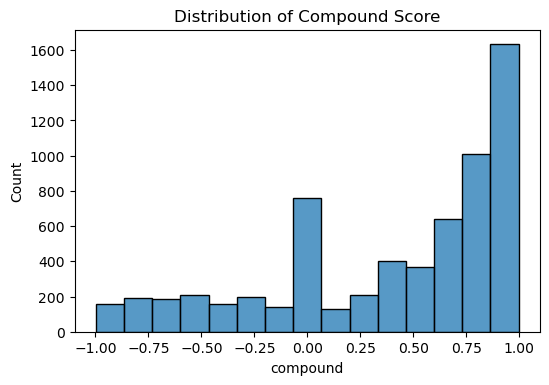

In [16]:
plt.figure(dpi = 100)
sns.histplot(data = df, x = 'compound', bins=15)
plt.title('Distribution of Compound Score');

- Most of the guests have posted positive review as the distribution of compound score is skewed towards high and positive compound scores.
- A spike at value zero can be attributed to review which are neutral in nature.

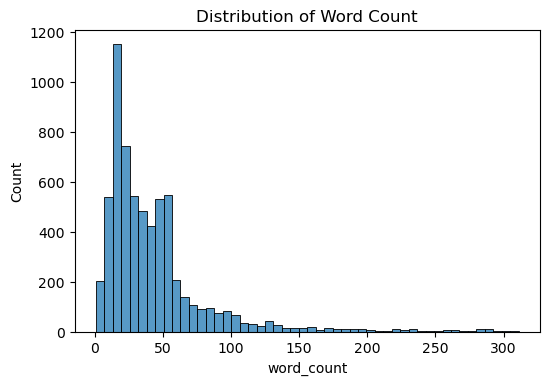

In [17]:
plt.figure(dpi = 100)
sns.histplot(data = df, x = 'word_count', bins = 50)
plt.title('Distribution of Word Count');

- Most of the review contains less than 50 words with maximum reviews having words in the range of 20 - 30 words.

In [18]:
df.loc[df['compound'] > 0.2 , 'label'] = 'Positive' 
df.loc[df['compound'] < -0.2, 'label'] = 'Negative'  
df

,Review,date,compound,word_count,label
0,I was very impressed with the resort. Great s...,2019/08/20,0.9421,33,Positive
1,The rooms were nice the outside needs work als...,2019/08/20,0.8360,25,Positive
2,Great location! I have stayed at this hotel on...,2019/08/20,0.6588,20,Positive
3,The hotel was adequate for my stay. The strips...,2019/08/20,0.3634,84,Positive
4,"Great location, room was large and spacious. P...",2019/08/19,0.9260,20,Positive
...,...,...,...,...,...
6443,"·the staff were all so friendly. frank, the ch...",2019/07/12,0.9716,132,Positive
6444,·the internet barely worked or didn't work,2019/07/12,0.0000,7,NaN
6445,·the location was great. ·the bed was...,2019/07/10,0.2975,16,Positive
6446,·we were early for check in and the staff was ...,2019/07/10,0.0000,25,NaN


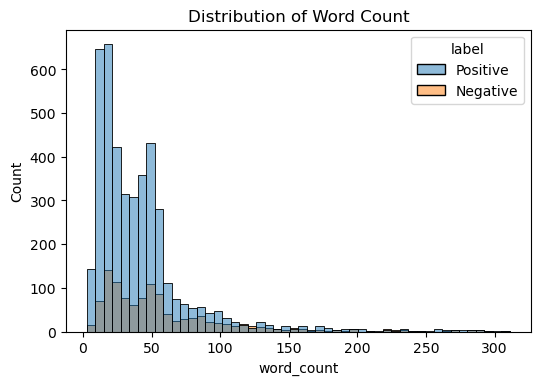

In [19]:
plt.figure(dpi = 100)
sns.histplot(data = df, x = 'word_count', bins = 50, hue = 'label')
plt.title('Distribution of Word Count');

- Guests who gave positive review use more words than those who gave negative review.

### Comparision of compound score by time.

In [20]:
df['year'] = pd.DatetimeIndex(df['date']).year

In [21]:
df.year.unique()

array([2019, 2018], dtype=int64)

<AxesSubplot:xlabel='year', ylabel='compound'>

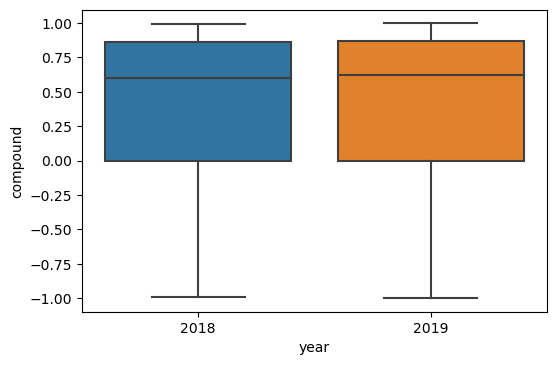

In [22]:
plt.figure(dpi = 100)
sns.boxplot(data = df, y = 'compound', x = 'year')

- These seems to be no difference in score between subsequent year.
- The variation of score also remaisn the same.

### Classfying reviews.
- Compound score greater than `0.2` will be classified as `Positive review`.
- Compound score less than `0.2` will be classified as `Negative review`.

In [23]:
pos_review = 0

for com in df['compound']:
    if com > 0.2:
        pos_review = pos_review + 1
    else:
        pos_review = pos_review

In [24]:
pos_review

4257

In [25]:
neg_review = 0

for com in df['compound']:
    if com < -0.2:
        neg_review = neg_review + 1
    else:
        neg_review = neg_review

In [26]:
neg_review

1103

In [27]:
da = pd.DataFrame(data = [pos_review, neg_review],
                index=('Positive Review', 'Negative review'), 
                columns= ['Count'])

In [28]:
da

,Count
Positive Review,4257
Negative review,1103


In [29]:
da['Percent'] = round(da['Count'] * 100 / len(df), 0)

In [30]:
da

,Count,Percent
Positive Review,4257,67.0
Negative review,1103,17.0


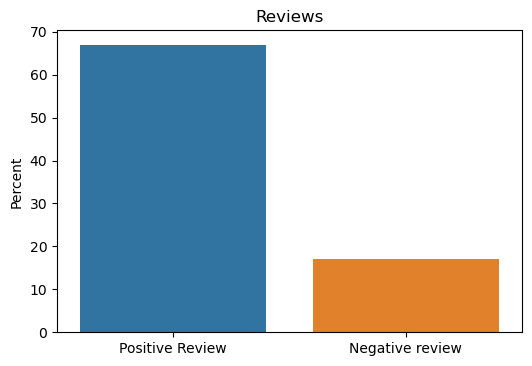

In [31]:
plt.figure(dpi = 100)
sns.barplot(data = da, x = da.index, y = 'Percent')
plt.title('Reviews');

- About 67% of the review has been classified to be positive while a handful of 17% have been classified to be negative review.

### Bag of words.

In [32]:
from sklearn.feature_extraction.text import CountVectorizer

In [33]:
cv = CountVectorizer(stop_words='english')

In [34]:
def get_top_n_words(series, n=None):
    vec = CountVectorizer(stop_words = 'english').fit(series)
    bag_of_words = vec.transform(series)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:n]


In [35]:
common_words = get_top_n_words(df[df['compound'] > 0.2]['Review'], 20)

df2 = pd.DataFrame(common_words, columns = ['Review_word' , 'count'])


In [36]:
#df2

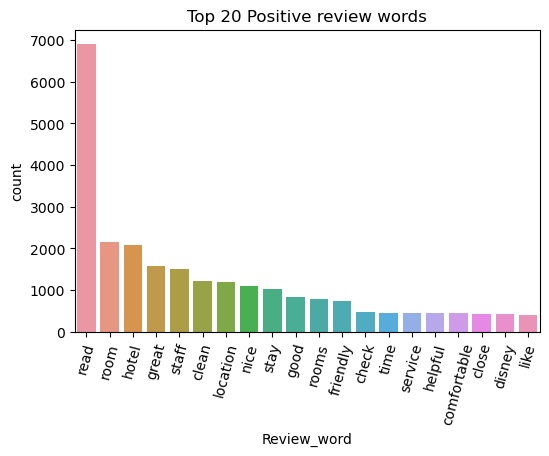

In [37]:
plt.figure(dpi = 100)
plt.xticks(rotation = 75)
sns.barplot(data = df2, x = 'Review_word', y = 'count')
plt.title('Top 20 Positive review words');

- Guests who gave good review mostly liked areas such as `read`, `room`, `staff`, `loation`, `stay`, `time`, `service`, `disney`.

In [38]:
common_words = get_top_n_words(df[df['compound'] < -0.2]['Review'], 20)

df3 = pd.DataFrame(common_words, columns = ['Review_word' , 'count'])


In [39]:
#df3

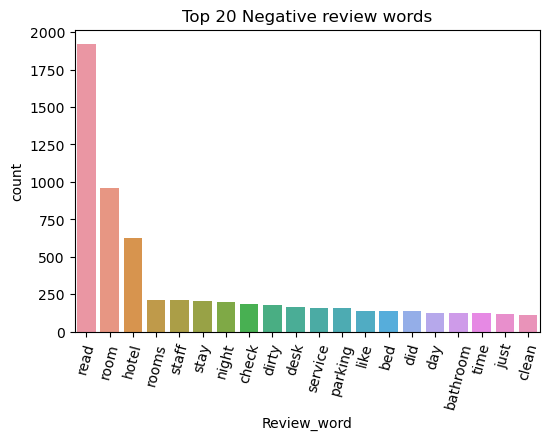

In [40]:
plt.figure(dpi = 100)
plt.xticks(rotation = 75)
sns.barplot(data = df3, x = 'Review_word', y = 'count')
plt.title('Top 20 Negative review words');

- Guests who gave negative review mostly disliked `rooms`, `read`, `staff`, `bathroom`, `clean`, `bed`, `parking`, `service`.

# Interesting Inferences
- While the distribution of compound score is skewed towards high and positive scores but it has high standard deviation because of which the mean value of score is around 0.4 only.
- Most of the guests gave their review in between 30-40 words.
- Although guests with positive review tend to use more words to review than guests who give negative review.
- These's no significant difference in compound score between 2018 and 2019. The overall hotel servie seems to be consistent through the time period given.
- Most of the review are classified to be positive. They make upto 67% of total reviews. While only 17% of the reviews are classified to be negative.
- Factors contributing towards good experience are read, room, staff, loation, stay, time, service, disney.
- Factors contributing towards bad experience are rooms, read, staff, bathroom, clean, bed, parking, service, dirty. 
- Hotel manaement can focus on bathroom, cleanliness, parking, service, etc to improve experience of there guests.

# Thanks